In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [284]:
data = pd.read_csv("4w.csv")

Features and Target variables

In [285]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# For 3W Uncomment the below line
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','Bus','HCV','LCV','Total']].values

# For HV and LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values

target = data['SD'].values

Normalize data

In [286]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [287]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [288]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [289]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
17/17 [==============================] - 1s 16ms/step - loss: 434.7434 - val_loss: 348.0020
Epoch 2/800
17/17 [==============================] - 0s 4ms/step - loss: 422.0463 - val_loss: 321.3267
Epoch 3/800
17/17 [==============================] - 0s 4ms/step - loss: 290.9004 - val_loss: 42.9246
Epoch 4/800
17/17 [==============================] - 0s 4ms/step - loss: 69.1376 - val_loss: 41.7617
Epoch 5/800
17/17 [==============================] - 0s 4ms/step - loss: 53.4359 - val_loss: 39.7612
Epoch 6/800
17/17 [==============================] - 0s 3ms/step - loss: 50.1985 - val_loss: 35.0362
Epoch 7/800
17/17 [==============================] - 0s 4ms/step - loss: 50.3165 - val_loss: 34.2960
Epoch 8/800
17/17 [==============================] - 0s 4ms/step - loss: 48.3944 - val_loss: 39.0987
Epoch 9/800
17/17 [==============================] - 0s 4ms/step - loss: 49.3091 - val_loss: 32.6232
Epoch 10/800
17/17 [==============================] - 0s 4ms/step - loss: 48.3635 - v

Visualize LSTM results

0.32017209591556217


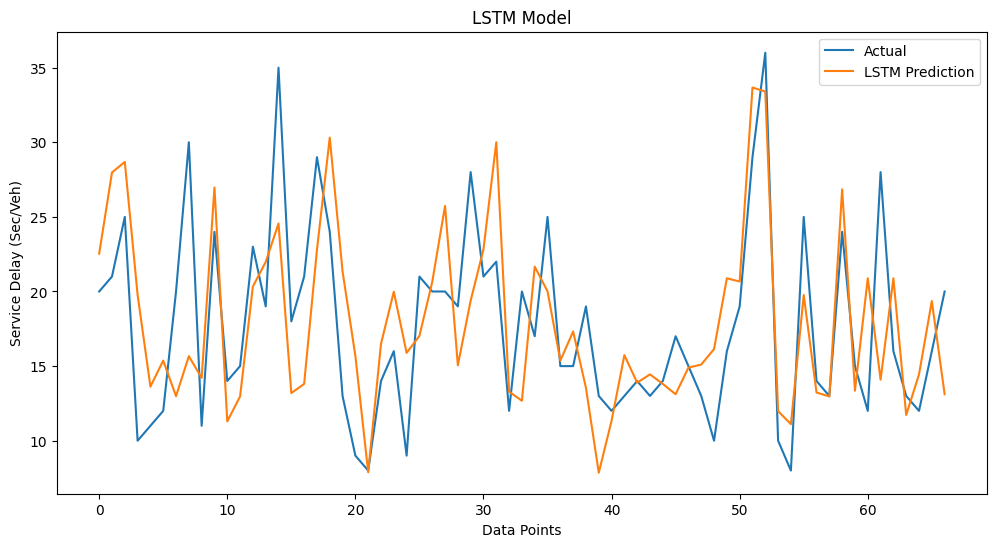

In [290]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [291]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/500
9/9 [==============================] - 3s 47ms/step - loss: 435.4818 - val_loss: 349.4650
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 429.4869 - val_loss: 339.9828
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 411.2831 - val_loss: 305.6272
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 322.5831 - val_loss: 117.6615
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 123.3639 - val_loss: 49.4136
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 82.9902 - val_loss: 49.0270
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 57.1940 - val_loss: 53.9955
Epoch 8/500
9/9 [==============================] - 0s 9ms/step - loss: 47.2843 - val_loss: 34.3763
Epoch 9/500
9/9 [==============================] - 0s 7ms/step - loss: 45.1804 - val_loss: 38.4421
Epoch 10/500
9/9 [==============================] - 0s 7ms/step - loss: 40.8096 - val_loss: 28.2625

Visualize BiLSTM results

0.3029710417934597


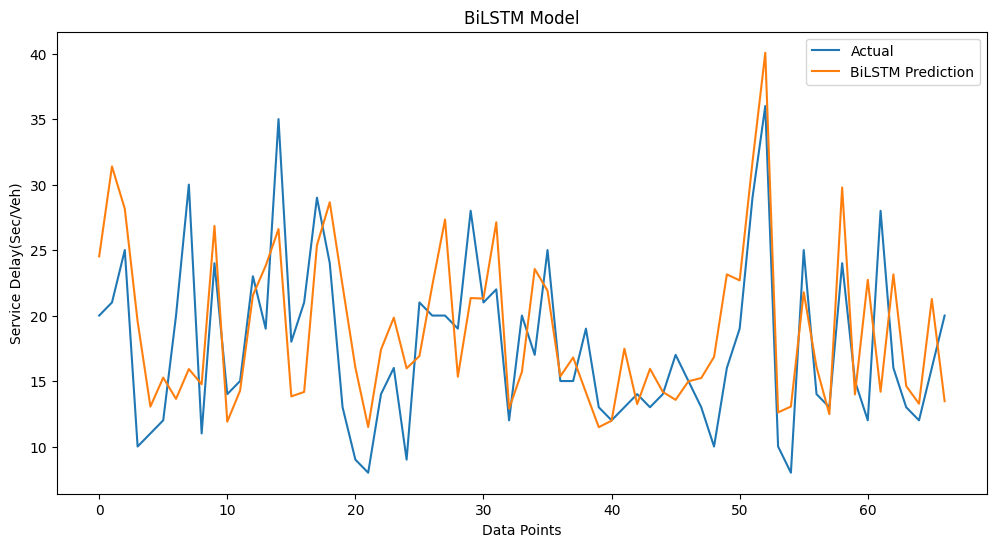

In [292]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [293]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
17/17 [==============================] - 1s 15ms/step - loss: 433.3915 - val_loss: 344.8673
Epoch 2/800
17/17 [==============================] - 0s 4ms/step - loss: 411.2496 - val_loss: 291.9573
Epoch 3/800
17/17 [==============================] - 0s 4ms/step - loss: 200.2706 - val_loss: 146.4949
Epoch 4/800
17/17 [==============================] - 0s 4ms/step - loss: 83.3936 - val_loss: 38.0276
Epoch 5/800
17/17 [==============================] - 0s 3ms/step - loss: 51.0834 - val_loss: 32.4194
Epoch 6/800
17/17 [==============================] - 0s 4ms/step - loss: 47.0280 - val_loss: 32.0164
Epoch 7/800
17/17 [==============================] - 0s 3ms/step - loss: 46.8850 - val_loss: 33.5334
Epoch 8/800
17/17 [==============================] - 0s 3ms/step - loss: 46.6559 - val_loss: 30.5506
Epoch 9/800
17/17 [==============================] - 0s 4ms/step - loss: 47.0195 - val_loss: 33.2172
Epoch 10/800
17/17 [==============================] - 0s 3ms/step - loss: 46.6212 - 

Visualize GRU results

In [294]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

KeyboardInterrupt: 

In [ ]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/500
8/8 [==============================] - 3s 62ms/step - loss: 417.2959 - val_loss: 379.9238
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 405.8164 - val_loss: 362.9864
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 380.3573 - val_loss: 319.1730
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 308.7929 - val_loss: 187.4343
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 106.9654 - val_loss: 105.9572
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 65.1675 - val_loss: 44.4805
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 55.5894 - val_loss: 36.2616
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 42.0935 - val_loss: 40.4035
Epoch 9/500
8/8 [==============================] - 0s 7ms/step - loss: 42.3942 - val_loss: 35.6057
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 37.8246 - val_loss: 35.717

Visualize BiGRU results

0.36744997997727324


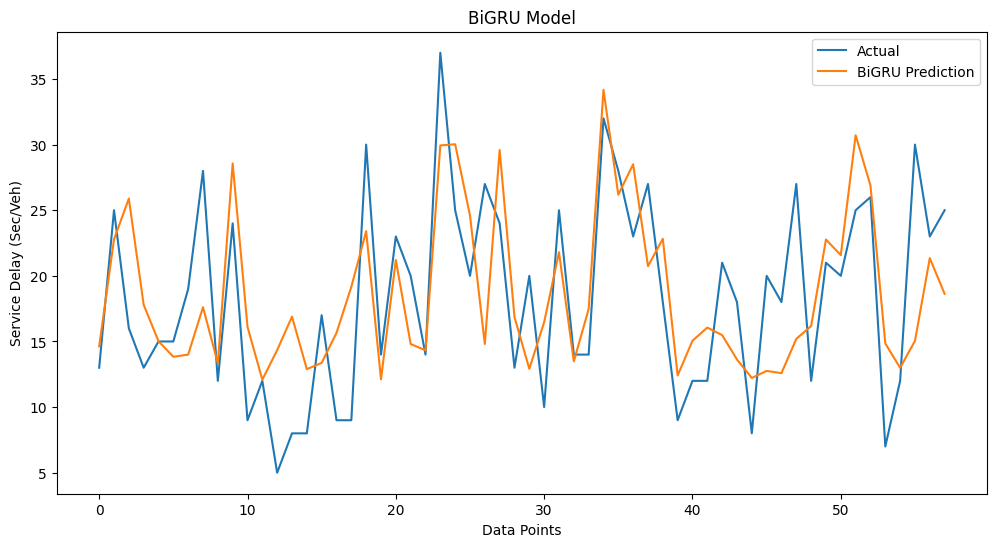

In [ ]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [ ]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
15/15 [==============================] - 0s 9ms/step - loss: 410.3048 - val_loss: 364.3544
Epoch 2/800
15/15 [==============================] - 0s 2ms/step - loss: 376.2422 - val_loss: 315.3249
Epoch 3/800
15/15 [==============================] - 0s 4ms/step - loss: 304.1151 - val_loss: 223.7430
Epoch 4/800
15/15 [==============================] - 0s 4ms/step - loss: 191.2245 - val_loss: 106.7271
Epoch 5/800
15/15 [==============================] - 0s 2ms/step - loss: 80.8289 - val_loss: 37.3231
Epoch 6/800
15/15 [==============================] - 0s 2ms/step - loss: 39.4495 - val_loss: 37.1289
Epoch 7/800
15/15 [==============================] - 0s 4ms/step - loss: 39.6519 - val_loss: 35.4629
Epoch 8/800
15/15 [==============================] - 0s 2ms/step - loss: 38.1549 - val_loss: 34.0554
Epoch 9/800
15/15 [==============================] - 0s 4ms/step - loss: 38.0204 - val_loss: 33.9329
Epoch 10/800
15/15 [==============================] - 0s 3ms/step - loss: 37.6944 -

Visualize CNN results

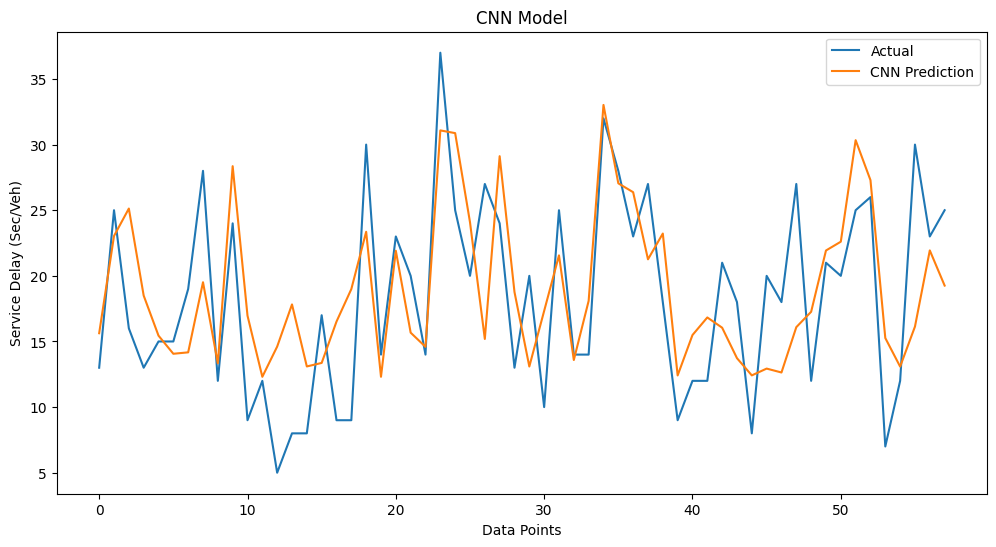

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [ ]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
15/15 [==============================] - 1s 13ms/step - loss: 416.8563 - val_loss: 378.8997
Epoch 2/800
15/15 [==============================] - 0s 4ms/step - loss: 400.6602 - val_loss: 349.3167
Epoch 3/800
15/15 [==============================] - 0s 4ms/step - loss: 328.8092 - val_loss: 200.0762
Epoch 4/800
15/15 [==============================] - 0s 4ms/step - loss: 106.4348 - val_loss: 104.2304
Epoch 5/800
15/15 [==============================] - 0s 4ms/step - loss: 65.6650 - val_loss: 60.6529
Epoch 6/800
15/15 [==============================] - 0s 3ms/step - loss: 53.9877 - val_loss: 56.7573
Epoch 7/800
15/15 [==============================] - 0s 4ms/step - loss: 48.4875 - val_loss: 49.3901
Epoch 8/800
15/15 [==============================] - 0s 4ms/step - loss: 45.6975 - val_loss: 47.9267
Epoch 9/800
15/15 [==============================] - 0s 3ms/step - loss: 44.0549 - val_loss: 43.4530
Epoch 10/800
15/15 [==============================] - 0s 3ms/step - loss: 42.3260 

Visualize CNN_LSTM results

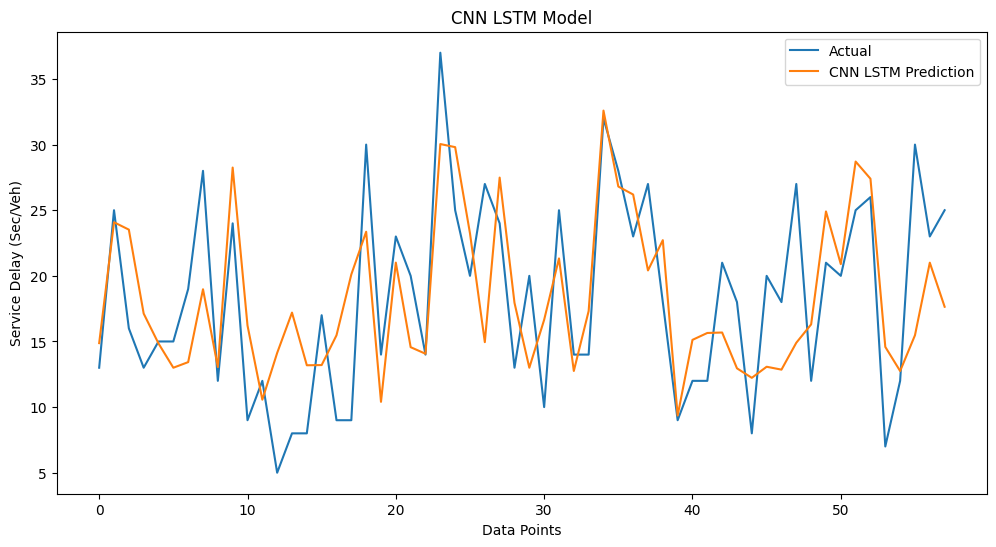

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [ ]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/192
8/8 [==============================] - 2s 34ms/step - loss: 418.6692 - val_loss: 383.9218
Epoch 2/192
8/8 [==============================] - 0s 5ms/step - loss: 412.8799 - val_loss: 376.8614
Epoch 3/192
8/8 [==============================] - 0s 5ms/step - loss: 403.1703 - val_loss: 363.1672
Epoch 4/192
8/8 [==============================] - 0s 7ms/step - loss: 383.8333 - val_loss: 333.5672
Epoch 5/192
8/8 [==============================] - 0s 6ms/step - loss: 339.1927 - val_loss: 265.2125
Epoch 6/192
8/8 [==============================] - 0s 5ms/step - loss: 225.2611 - val_loss: 119.3759
Epoch 7/192
8/8 [==============================] - 0s 7ms/step - loss: 75.2035 - val_loss: 74.1343
Epoch 8/192
8/8 [==============================] - 0s 5ms/step - loss: 74.6452 - val_loss: 46.7615
Epoch 9/192
8/8 [==============================] - 0s 7ms/step - loss: 46.9452 - val_loss: 55.3352
Epoch 10/192
8/8 [==============================] - 0s 5ms/step - loss: 51.1151 - val_loss: 42.0

Visualize CNN_BiLSTM results

0.406682333643519


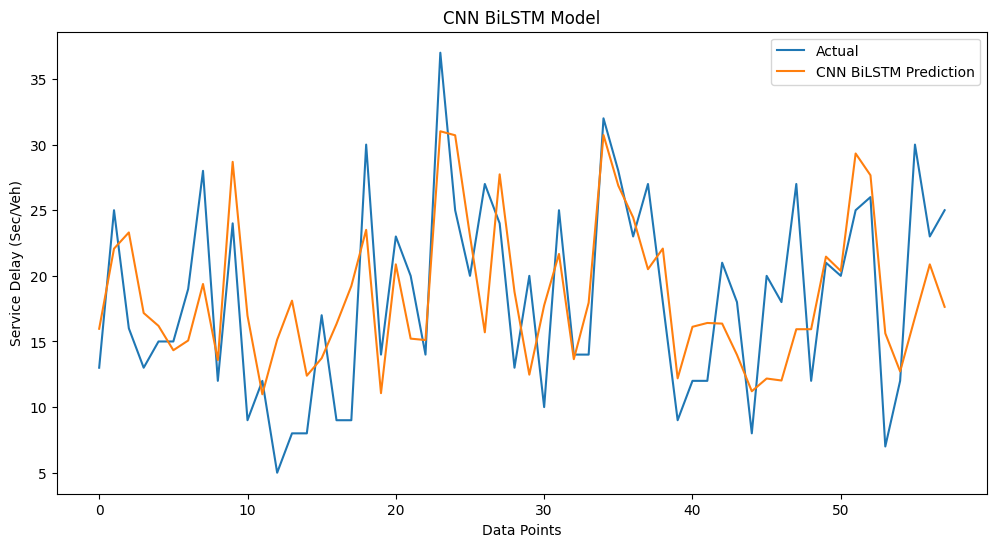

In [ ]:
print(r2_cnn_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [ ]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

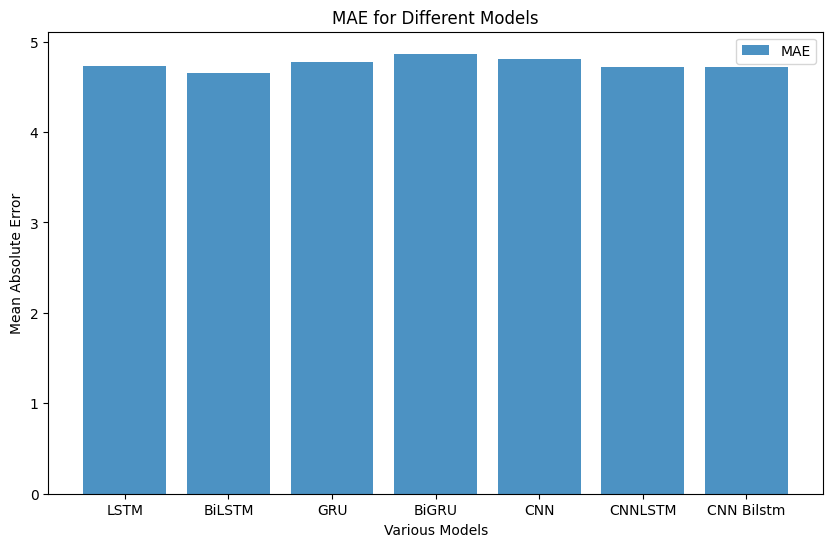

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

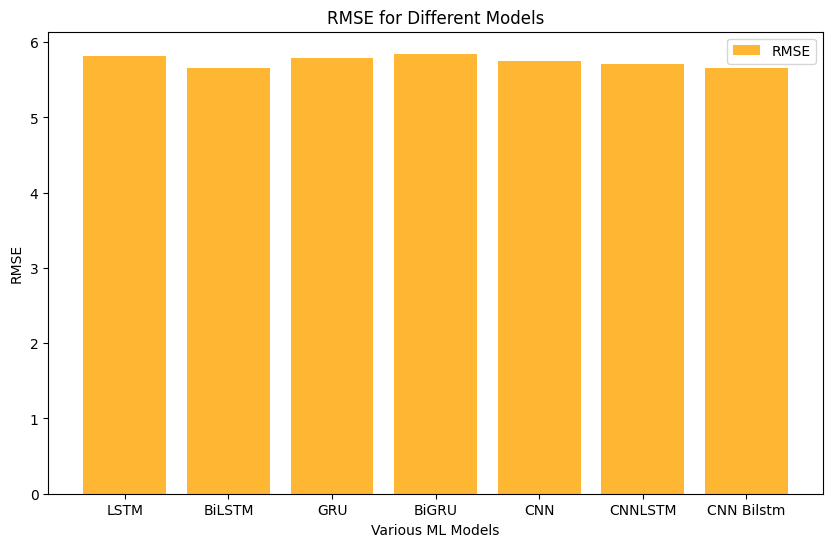

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

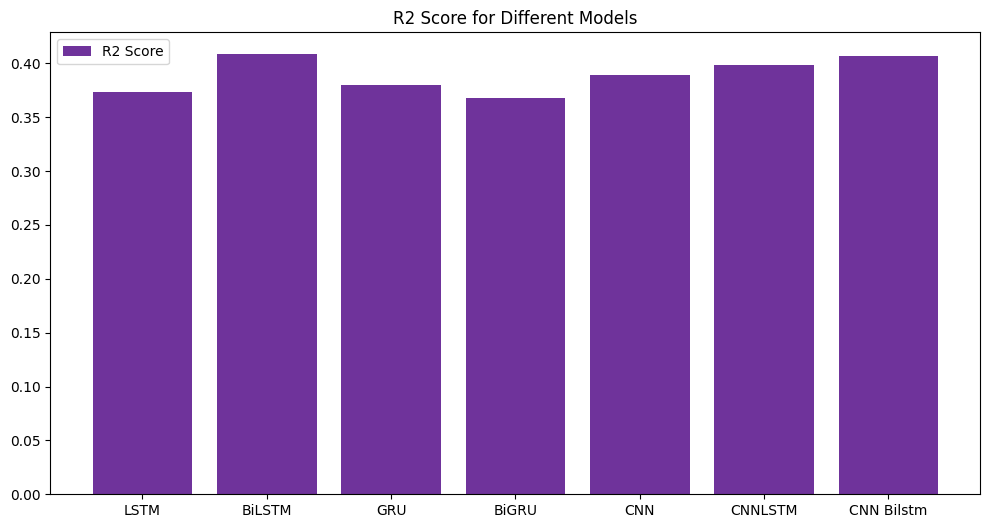

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [ ]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 4.7307799437950395
LSTM MSE: 5.8176332661212795
LSTM R2 Score: 0.3736468103657402

BiLSTM MAE: 4.650455935248013
BiLSTM MSE: 5.653988545049418
BiLSTM R2 Score: 0.40838869976928194

GRU MAE: 4.7728117416644915
GRU MSE: 5.7876576166513285
GRU R2 Score: 0.3800848143947323

BiGRU MAE: 4.866052791990083
BiGRU MSE: 5.846340837307251
BiGRU R2 Score: 0.36744997997727324

CNN MAE: 4.812293529510498
CNN MSE: 5.74444586579957
CNN R2 Score: 0.38930706684511807

CNN LSTM MAE: 4.719438717283052
CNN LSTM MSE: 5.703481906386917
CNN LSTM R2 Score: 0.3979857817101077

CNN BiLSTM MAE: 4.724534856862035
CNN BiLSTM MSE: 5.662136485973794
CNN BiLSTM R2 Score: 0.406682333643519


Plot predictions for each model

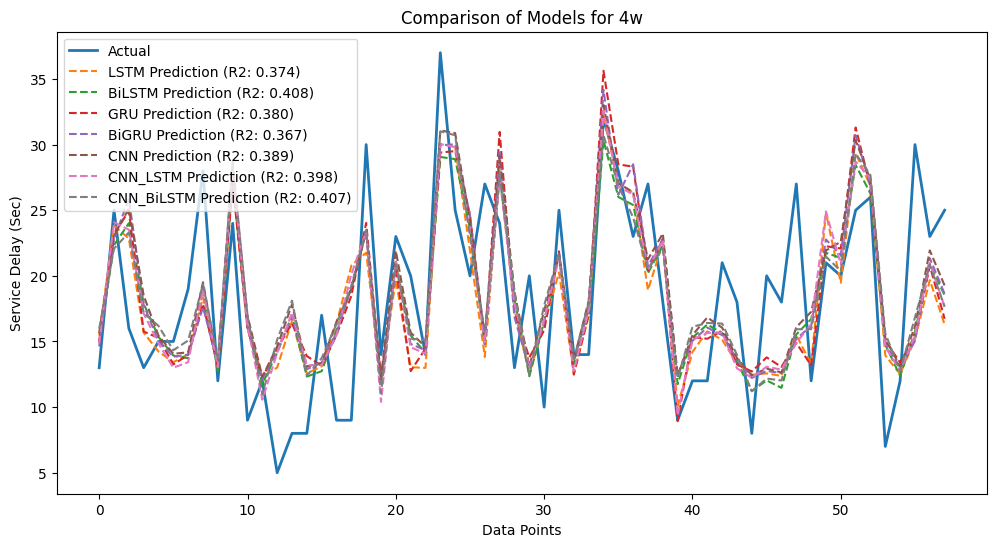

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 4w')
plt.show()

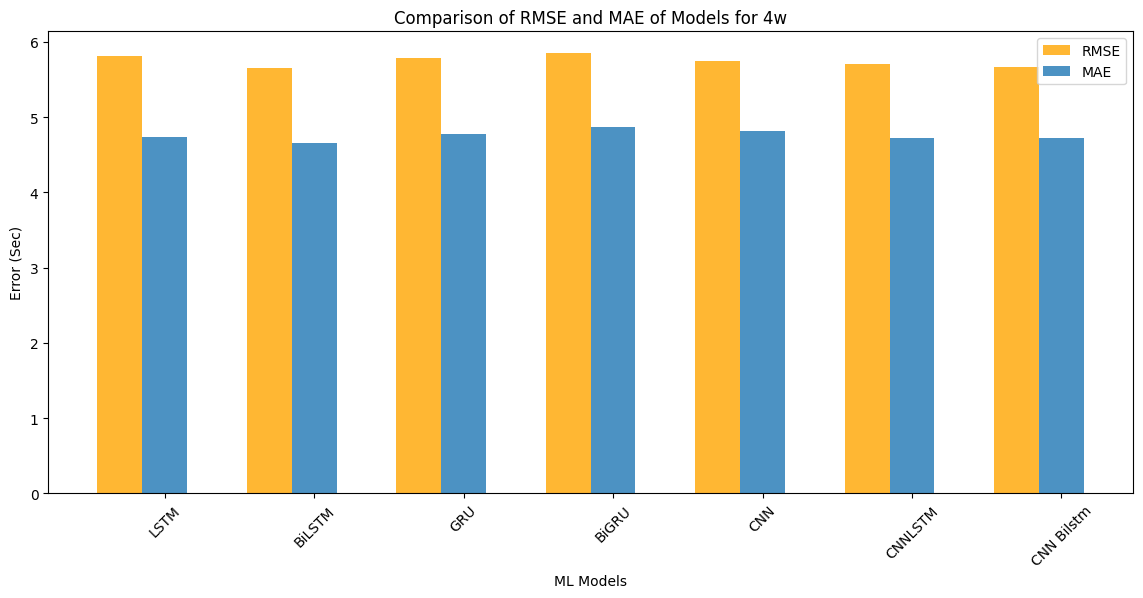

In [ ]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 4w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()